# Семинар №2. Статистические оценки

**Немного scipy**

## Описание функций pmf, pdf, cdf, rvs с примерами

В работе с распределениями вероятностей в библиотеке scipy.stats часто используются функции:

    pmf (Probability Mass Function) — функция массы вероятности (для дискретных распределений).
    pdf (Probability Density Function) — функция плотности вероятности (для непрерывных распределений).
    cdf (Cumulative Distribution Function) — функция распределения.
    rvs (Random Variates) — генерация случайных величин из заданного распределения.

Понимание этих функций и умение их применять является ключевым при моделировании и анализе случайных процессов. Рассмотрим каждую из них подробно с примерами.

### 1. pmf — Функция массы вероятности

Описание:

    Применяется для дискретных распределений.
    Возвращает вероятность того, что случайная величина X примет конкретное значение x: P(X=x).

Пример использования:

Рассмотрим биномиальное распределение с параметрами n=10 и p=0.5. Найдем вероятность того, что количество успехов k=3.

In [ ]:
from scipy.stats import binom

n = 10
p = 0.5
k = 3

prob = binom.pmf(k, n, p)
print(f"Вероятность того, что будет ровно {k} успехов: {prob}")

Вероятность того, что будет ровно 3 успехов: 0.1171875


binom.pmf(k, n, p) вычисляет P(X=k) для биномиального распределения.

### 2. pdf — Функция плотности вероятности

Описание:

    Применяется для непрерывных распределений.
    Возвращает значение функции плотности вероятности в точке xx.

Пример использования:

Рассмотрим нормальное распределение с параметрами μ=0 и σ=1. Найдем значение функции плотности в точке x=1.

norm.pdf(x, mu, sigma) вычисляет значение функции плотности для нормального распределения в точке xx.

In [ ]:
from scipy.stats import norm

mu = 0
sigma = 1
x = 1

density = norm.pdf(x, mu, sigma)
print(f"Значение функции плотности в точке {x}: {density}")


Значение функции плотности в точке 1: 0.24197072451914337


### 3. cdf — Функция распределения

Описание:

    Применяется для дискретных и непрерывных распределений.
    Возвращает вероятность того, что случайная величина XX примет значение меньше или равно xx: P(X≤x)P(X≤x).

Пример использования:

Рассмотрим экспоненциальное распределение с параметром λ=0.5. Найдем вероятность того, что случайная величина примет значение меньше или равно x=2x=2.

In [ ]:
from scipy.stats import expon

lam = 0.5
x = 2

prob = expon.cdf(x, scale=1/lam)
print(f"Вероятность того, что X ≤ {x}: {prob}")

Вероятность того, что X ≤ 2: 0.6321205588285577


expon.cdf(x, scale=1/lam) вычисляет P(X≤x) для экспоненциального распределения.

### 4. rvs — Генерация случайных величин

Описание:

Применяется для генерации случайных чисел из заданного распределения.\
    Полезно для моделирования и проведения статистических экспериментов.

Пример использования:

Сгенерируем выборку из 5 случайных чисел из распределения Пуассона с параметром λ=3.

In [ ]:
from scipy.stats import poisson

lam = 3
samples = poisson.rvs(lam, size=5)
print(f"Сгенерированные случайные значения: {samples}")


Сгенерированные случайные значения: [1 2 1 0 3]


poisson.rvs(lam, size=n) генерирует n случайных чисел из распределения Пуассона.

# Изучение основных распределений вероятностей

В этом семинаре мы рассмотрим некоторые из основных распределений вероятностей, используемых в статистике и теории вероятностей. Мы изучим следующие распределения:

* Распределение Бернулли
* Биномиальное распределение
* Геометрическое распределение
* Распределение Пуассона
* Экспоненциальное распределение
* Нормальное распределение

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import bernoulli, binom, geom, poisson, expon, norm
from ipywidgets import interact, FloatSlider, IntSlider
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## 1. Распределение Бернулли
Описание

Распределение Бернулли описывает эксперимент с двумя возможными исходами: "успех" (с вероятностью pp) и "неудача" (с вероятностью 1−p1−p).
Функции вероятности

PMF (функция плотности вероятности): \
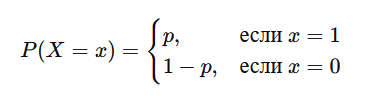


CDF (функция распределения): \
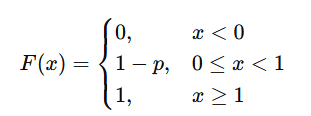

Интерактивный график

In [ ]:
def plot_bernoulli(p):
    x = [0, 1]
    pmf = bernoulli.pmf(x, p)
    cdf = bernoulli.cdf(x, p)

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # PMF
    axs[0].bar(x, pmf, color='skyblue', width=0.1)
    axs[0].set_title('PMF распределения Бернулли')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('P(X = x)')
    axs[0].set_xticks(x)

    # CDF
    axs[1].step([0, 1, 1.5], [0, 1 - p, 1], where='post', color='red')
    axs[1].set_title('CDF распределения Бернулли')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('F(X)')
    axs[1].set_xticks([0, 1])
    axs[1].set_ylim(0, 1.1)

    plt.show()

interact(plot_bernoulli, p=FloatSlider(value=0.5, min=0, max=1, step=0.01, description='p'));


interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, step=0.01), Output()), _dom_classes=('w…

### 1.1 Генерация случайных чисел из распределения Бернулли

Давайте сгенерируем выборку из 1000 случайных переменных Бернулли с вероятностью успеха pp.

In [ ]:
def generate_bernoulli_samples(p):
    samples = bernoulli.rvs(p, size=1000)
    plt.hist(samples, bins=[-0.5, 0.5, 1.5], edgecolor='black', color='lightgreen', rwidth=0.8)
    plt.title('Гистограмма выборки из распределения Бернулли')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.xticks([0, 1])
    plt.show()

interact(generate_bernoulli_samples, p=FloatSlider(value=0.5, min=0, max=1, step=0.01, description='p'));


interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, step=0.01), Output()), _dom_classes=('w…

**Графики:** \
    PMF (функция массы вероятности): показывает вероятность каждого возможного значения (0 или 1). \
    CDF (функция распределения): показывает накопленную вероятность для значений x≤Xx≤X. \

**Как изменяется график при изменении p**

  PMF: \
      При увеличении pp вероятность успеха (при x=1) увеличивается, а вероятность неудачи (при x=0) уменьшается.
      График показывает два столбца: один при x=0x=0 и другой при x=1. Высота столбцов соответствует вероятностям. \
CDF: \
      При p близком к 0, CDF резко поднимается на небольшую величину при x=0 и достигает 1 при x≥1x≥1.
      При p близком к 1, CDF почти не изменяется до x=1, где она скачкообразно достигает 1.

Интуиция: \
 Если вероятность успеха p высокая, то ожидается, что исход 1 (успех) будет более вероятен. Это отражается в графике PMF, где столбец при x=1 становится выше. \
Практический пример: Подбрасывание монеты с вероятностью выпадения герба p. При изменении p мы моделируем несправедливую монету, где одна сторона выпадает чаще.

### 1.2 Пример задачи

Задача: В эксперименте подбрасывают монету, вероятность выпадения герба p=0.7. Какова вероятность того, что при одном подбрасывании выпадет герб?

In [ ]:
p = 0.7
prob_head = bernoulli.pmf(1, p)
print(f"Вероятность выпадения герба: {prob_head}")

Вероятность выпадения герба: 0.7


Пример 1: Эмпирическая проверка закона больших чисел

Описание: Давайте проведем серию экспериментов Бернулли и сравним эмпирическую вероятность успеха с теоретической по мере увеличения числа испытаний.

In [ ]:
def bernoulli_law_of_large_numbers(p):
    n_trials = np.logspace(1, 5, num=5, dtype=int)
    empirical_probs = []

    for n in n_trials:
        samples = bernoulli.rvs(p, size=n)
        empirical_p = samples.mean()
        empirical_probs.append(empirical_p)

    plt.figure(figsize=(8, 5))
    plt.plot(n_trials, empirical_probs, marker='o', linestyle='--', label='Эмпирическая вероятность')
    plt.axhline(y=p, color='r', linestyle='-', label='Теоретическая вероятность')
    plt.xscale('log')
    plt.xlabel('Количество испытаний')
    plt.ylabel('Вероятность успеха')
    plt.title('Закон больших чисел для распределения Бернулли')
    plt.legend()
    plt.show()


interact(bernoulli_law_of_large_numbers, p=FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description='p'));


interactive(children=(FloatSlider(value=0.5, description='p', max=0.99, min=0.01, step=0.01), Output()), _dom_…

Задача: В производственной линии вероятность того, что изделие бракованное, составляет p=0.02. Смоделируйте 1000 проверок изделий и определите количество бракованных.

In [ ]:
p = 0.02
n = 1000
samples = bernoulli.rvs(p, size=n)
num_defective = samples.sum()
print(f"Из {n} проверенных изделий бракованных: {num_defective}")

Из 1000 проверенных изделий бракованных: 24


## 2. Биномиальное распределение
Описание

Биномиальное распределение моделирует количество успехов в серии из n независимых испытаний Бернулли с вероятностью успеха p в каждом испытании.



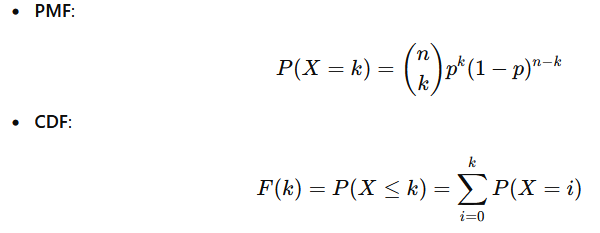

In [ ]:
def plot_binomial(n, p):
    x = np.arange(0, n+1)
    pmf = binom.pmf(x, n, p)
    cdf = binom.cdf(x, n, p)

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # PMF
    axs[0].bar(x, pmf, color='lightgreen')
    axs[0].set_title('PMF биномиального распределения')
    axs[0].set_xlabel('k')
    axs[0].set_ylabel('P(X = k)')

    # CDF
    axs[1].step(x, cdf, where='post', color='orange')
    axs[1].set_title('CDF биномиального распределения')
    axs[1].set_xlabel('k')
    axs[1].set_ylabel('F(X)')

    plt.show()

interact(plot_binomial,
         n=IntSlider(value=10, min=10, max=500, step=10, description='n'),
         p=FloatSlider(value=0.5, min=0, max=0.5, step=0.01, description='p'));


interactive(children=(IntSlider(value=10, description='n', max=500, min=10, step=10), FloatSlider(value=0.5, d…

**Описание**

**Параметры:** \
n — число испытаний. \
p — вероятность успеха в каждом испытании. \
Графики: \
PMF: показывает вероятность получить k успехов в nn испытаниях. \
CDF: показывает вероятность получить не более k успехов. \

**Как изменяется график при изменении n и p**

Изменение p: \
При pp близком к 0, распределение сдвигается влево; большинство вероятностей сосредоточено на меньших значениях k.
При pp близком к 1, распределение сдвигается вправо; больше успехов ожидается. \
Изменение n: \
При увеличении n, распределение становится более растянутым и симметричным (если p=0.5).
Большое n и p=0.5 приводят к симметричному распределению вокруг n/2.
Интуиция: p определяет склонность к успеху или неудаче в каждом испытании. n определяет, сколько раз мы проводим испытание, что влияет на возможный диапазон успехов k.


### 2.1 Генерация случайных чисел из биномиального распределения

Сгенерируем выборку из 1000 случайных переменных биномиального распределения с параметрами n и p.

In [ ]:
def generate_binomial_samples(n, p):
    samples = binom.rvs(n, p, size=1000)
    plt.hist(samples, bins=range(n+2), edgecolor='black', color='lightcoral', align='left', rwidth=0.8)
    plt.title('Гистограмма выборки из биномиального распределения')
    plt.xlabel('Количество успехов')
    plt.ylabel('Частота')
    plt.xticks(range(n+1))
    plt.show()

interact(generate_binomial_samples,
         n=IntSlider(value=10, min=10, max=50, step=1, description='n'),
         p=FloatSlider(value=0.5, min=0, max=1, step=0.01, description='p'));


interactive(children=(IntSlider(value=10, description='n', max=50, min=10), FloatSlider(value=0.5, description…

### 2.2 Пример задачи

Задача: Вероятность того, что лампочка перегорит в течение первого года эксплуатации, равна 0.1. Какова вероятность того, что из 10 лампочек перегорят ровно 2 в течение первого года?

In [ ]:
n = 10
p = 0.1
k = 2
prob = binom.pmf(k, n, p)
print(f"Вероятность того, что перегорят ровно 2 лампочки: {prob}")


Вероятность того, что перегорят ровно 2 лампочки: 0.19371024450000007


## 3. Геометрическое распределение
Описание

Геометрическое распределение моделирует количество неудач до первого успеха в серии независимых испытаний Бернулли с вероятностью успеха p.
Функции вероятности

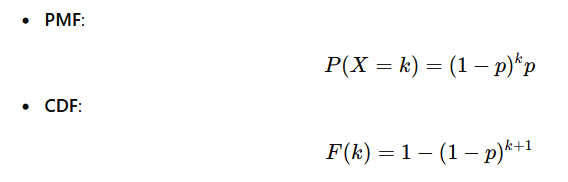

In [ ]:
def plot_geometric(p):
    x = np.arange(0, 40)
    pmf = geom.pmf(x, p)
    cdf = geom.cdf(x, p)

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # PMF
    axs[0].bar(x, pmf, color='violet')
    axs[0].set_title('PMF геометрического распределения')
    axs[0].set_xlabel('k')
    axs[0].set_ylabel('P(X = k)')

    # CDF
    axs[1].step(x, cdf, where='post', color='brown')
    axs[1].set_title('CDF геометрического распределения')
    axs[1].set_xlabel('k')
    axs[1].set_ylabel('F(X)')

    plt.show()

interact(plot_geometric, p=FloatSlider(value=0.5, min=0.01, max=1, step=0.01, description='p'));


interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, min=0.01, step=0.01), Output()), _dom_c…

**Описание**

Параметр: \
 p — вероятность успеха в каждом испытании. \
Графики: \
PMF: показывает вероятность того, что первый успех произойдет на k-м испытании. \
CDF: показывает вероятность того, что первый успех произойдет не позднее k-го испытания. \

**Как изменяется график при изменении p** \
PMF: \
При увеличении p, вероятность успеха в ранних испытаниях увеличивается, график круто спадает. \
При уменьшении p, график спадает медленнее, вероятность первого успеха на более поздних испытаниях увеличивается. \
CDF: \
При большем p, CDF быстро достигает 1, так как успех ожидается раньше.
При меньшем p, CDF растет медленнее.

Интуиция: При высокой вероятности успеха p мы ожидаем, что первый успех произойдет быстро. График PMF показывает высокую вероятность на малых k.

### 3.1 Генерация случайных чисел из геометрического распределения

Сгенерируем выборку из 1000 случайных переменных геометрического распределения с параметром p.

In [ ]:
def generate_geometric_samples(p):
    samples = geom.rvs(p, size=1000)
    plt.hist(samples, bins=range(1, max(samples)+2), edgecolor='black', color='skyblue', align='left', rwidth=0.8)
    plt.title('Гистограмма выборки из геометрического распределения')
    plt.xlabel('Количество неудач до первого успеха')
    plt.ylabel('Частота')
    plt.show()

interact(generate_geometric_samples, p=FloatSlider(value=0.5, min=0.01, max=1, step=0.01, description='p'));


interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, min=0.01, step=0.01), Output()), _dom_c…

### 3.2 Пример задачи

Задача: Вероятность успеха в испытании равна 0.2. Какова вероятность того, что первый успех произойдет на 3-м испытании?

In [ ]:
p = 0.2
k = 2  # так как геометрическое распределение считает количество неудач перед первым успехом
prob = geom.pmf(k+1, p)
print(f"Вероятность первого успеха на 3-м испытании: {prob}")


Вероятность первого успеха на 3-м испытании: 0.12800000000000003


## 4. Распределение Пуассона
Описание

Распределение Пуассона описывает число событий, происходящих в фиксированном интервале времени или пространстве при известной средней интенсивности событий λ.
Функции вероятности

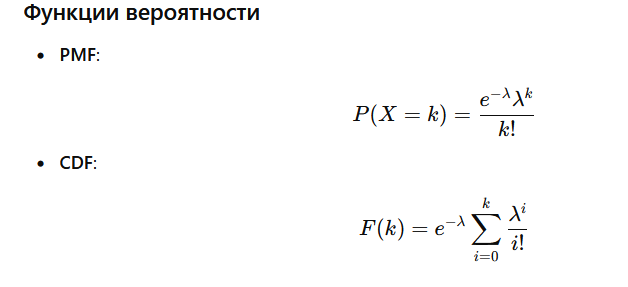

In [ ]:
def plot_poisson(lam):
    x = np.arange(0, lam*3)
    pmf = poisson.pmf(x, lam)
    cdf = poisson.cdf(x, lam)

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # PMF
    axs[0].bar(x, pmf, color='gold')
    axs[0].set_title('PMF распределения Пуассона')
    axs[0].set_xlabel('k')
    axs[0].set_ylabel('P(X = k)')

    # CDF
    axs[1].step(x, cdf, where='post', color='darkgreen')
    axs[1].set_title('CDF распределения Пуассона')
    axs[1].set_xlabel('k')
    axs[1].set_ylabel('F(X)')

    plt.show()

interact(plot_poisson, lam=FloatSlider(value=3, min=0.1, max=15, step=0.1, description='λ'));


interactive(children=(FloatSlider(value=3.0, description='λ', max=15.0, min=0.1), Output()), _dom_classes=('wi…

**Описание**

Параметр: \
λ — среднее число событий в фиксированном интервале. \
Графики: \
PMF: показывает вероятность того, что произойдет k событий за интервал. \
CDF: показывает вероятность того, что произойдет не более k событий.

**Как изменяется график при изменении λ**

PMF: \
При малом λ, распределение сосредоточено на малых значениях k. \
При увеличении λ, распределение смещается вправо и становится более растянутым. \
Форма распределения меняется от асимметричной (при малых λ) к более симметричной (при больших λ). \
CDF: \
При увеличении λ, CDF растет медленнее, так как вероятность больших k становится значительной. \

Интуиция: λ отражает среднее число событий. При большем λ ожидается больше событий за интервал.

Сгенерируем выборку из 1000 случайных переменных распределения Пуассона с параметром λ.

In [ ]:
def generate_poisson_samples(lam):
    samples = poisson.rvs(lam, size=1000)
    plt.hist(samples, bins=range(0, max(samples)+2), edgecolor='black', color='plum', align='left', rwidth=0.8)
    plt.title('Гистограмма выборки из распределения Пуассона')
    plt.xlabel('Количество событий')
    plt.ylabel('Частота')
    plt.show()

interact(generate_poisson_samples, lam=FloatSlider(value=3, min=0.1, max=15, step=0.1, description='λ'));


interactive(children=(FloatSlider(value=3.0, description='λ', max=15.0, min=0.1), Output()), _dom_classes=('wi…

### 4.2 Пример задачи

Задача: Среднее число звонков в колл-центр за час составляет 5. Какова вероятность того, что за данный час поступит ровно 3 звонка?

In [ ]:
lam = 5
k = 5
prob = poisson.pmf(k, lam)
print(f"Вероятность поступления ровно 5 звонков за час: {prob}")


Вероятность поступления ровно 5 звонков за час: 0.17546736976785068


## 5. Экспоненциальное распределение
Описание

Экспоненциальное распределение моделирует время между событиями в процессе Пуассона с интенсивностью λ.



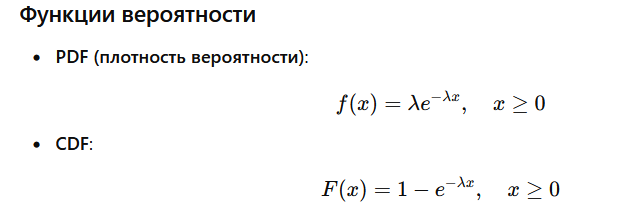

In [ ]:
def plot_exponential(lam):
    x = np.linspace(0, 15, 400)
    pdf = expon.pdf(x, scale=1/lam)
    cdf = expon.cdf(x, scale=1/lam)

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # PDF
    axs[0].plot(x, pdf, color='blue')
    axs[0].fill_between(x, pdf, color='lightblue')
    axs[0].set_title('PDF экспоненциального распределения')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('f(x)')

    # CDF
    axs[1].plot(x, cdf, color='red')
    axs[1].set_title('CDF экспоненциального распределения')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('F(x)')

    plt.show()

interact(plot_exponential, lam=FloatSlider(value=1, min=0.1, max=5, step=0.1, description='λ'));


interactive(children=(FloatSlider(value=1.0, description='λ', max=5.0, min=0.1), Output()), _dom_classes=('wid…

**Описание**

Параметр: \
λ — интенсивность события (обратное среднему времени между событиями). \
Графики: \
PDF (функция плотности вероятности): показывает плотность вероятности для времени между событиями.
CDF: показывает вероятность того, что событие произойдет не позднее времени x. \

**Как изменяется график при изменении λ** \

PDF:  \
При увеличении λ, график спадает быстрее, вероятность коротких интервалов увеличивается. \
При уменьшении λ, график спадает медленнее, увеличивается вероятность более длительных интервалов между событиями. \
CDF: \
При большем λ, CDF быстро достигает 1, так как события происходят чаще.
При меньшем λ, CDF растет медленнее. \

Интуиция: Большое λ означает, что события происходят часто, поэтому время ожидания между событиями короткое.

### 5.1 Генерация случайных чисел из экспоненциального распределения

Сгенерируем выборку из 1000 случайных переменных экспоненциального распределения с параметром λ.

In [ ]:
def generate_exponential_samples(lam):
    samples = expon.rvs(scale=1/lam, size=1000)
    plt.hist(samples, bins=30, edgecolor='black', color='khaki')
    plt.title('Гистограмма выборки из экспоненциального распределения')
    plt.xlabel('Время между событиями')
    plt.ylabel('Частота')
    plt.show()

interact(generate_exponential_samples, lam=FloatSlider(value=1, min=0.1, max=5, step=0.1, description='λ'));


interactive(children=(FloatSlider(value=1.0, description='λ', max=5.0, min=0.1), Output()), _dom_classes=('wid…

### 5.2 Пример задачи

Задача: В среднем, покупатель заходит в магазин каждые 10 минут. Какова вероятность того, что следующий покупатель зайдет не позднее, чем через 5 минут?

Решение с использованием Python:

In [ ]:
lam = 1 / 10  # так как среднее время между событиями 10 минут
x = 5
prob = expon.cdf(x, scale=1/lam)
print(f"Вероятность, что следующий покупатель зайдет в течение 5 минут: {prob}")


Вероятность, что следующий покупатель зайдет в течение 5 минут: 0.3934693402873666


## 6. Нормальное распределение
Описание

Нормальное распределение является одним из наиболее важных в статистике. Оно характеризуется двумя параметрами: математическим ожиданием μ и стандартным отклонением σ.

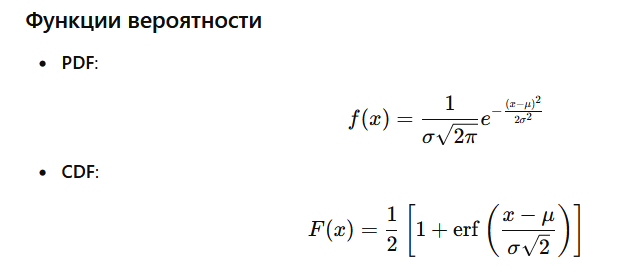

In [ ]:
def plot_normal(mu, sigma):
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 400)
    pdf = norm.pdf(x, mu, sigma)
    cdf = norm.cdf(x, mu, sigma)

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # PDF
    axs[0].plot(x, pdf, color='navy')
    axs[0].fill_between(x, pdf, color='lightsteelblue')
    axs[0].set_title('PDF нормального распределения')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('f(x)')

    # CDF
    axs[1].plot(x, cdf, color='maroon')
    axs[1].set_title('CDF нормального распределения')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('F(x)')

    plt.show()

interact(plot_normal,
         mu=FloatSlider(value=0, min=-10, max=10, step=0.1, description='μ'),
         sigma=FloatSlider(value=1, min=0.1, max=5, step=0.1, description='σ'));


interactive(children=(FloatSlider(value=0.0, description='μ', max=10.0, min=-10.0), FloatSlider(value=1.0, des…

### 6.1 Генерация случайных чисел из нормального распределения

Сгенерируем выборку из 1000 случайных переменных нормального распределения с параметрами μ и σ.

In [ ]:
def generate_normal_samples(mu, sigma):
    samples = norm.rvs(mu, sigma, size=1000)
    plt.hist(samples, bins=30, edgecolor='black', color='peachpuff')
    plt.title('Гистограмма выборки из нормального распределения')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.show()

interact(generate_normal_samples,
         mu=FloatSlider(value=0, min=-10, max=10, step=0.1, description='μ'),
         sigma=FloatSlider(value=1, min=0.1, max=5, step=0.1, description='σ'));


interactive(children=(FloatSlider(value=0.0, description='μ', max=10.0, min=-10.0), FloatSlider(value=1.0, des…

**Описание**

**Параметры:**
μ — математическое ожидание (среднее). \
σ — стандартное отклонение (меры разброса данных). \
Графики: \
PDF: показывает плотность вероятности для непрерывных значений x. \
CDF: показывает вероятность того, что случайная величина меньше или равна x. \

**Как изменяется график при изменении μ и σ** \
Изменение μ: \
График смещается вдоль оси x без изменения формы. \
Центр симметрии распределения находится в точке μ. \
Изменение σ: \
При увеличении σ, график становится более плоским и растянутым; разброс данных увеличивается. \
При уменьшении σ, график становится более узким и высоким; данные сосредоточены ближе к среднему. \

Интуиция: \
μ определяет положение распределения на числовой оси.
σ определяет, насколько данные разбросаны вокруг среднего значения.

### 6.2 Пример задачи

Задача: Рост взрослых мужчин в популяции распределен нормально с математическим ожиданием 175 см и стандартным отклонением 7 см. Какова вероятность того, что случайно выбранный мужчина имеет рост больше 180 см?

Решение с использованием Python:

In [ ]:
mu = 175
sigma = 7
x = 180
prob = 1 - norm.cdf(x, mu, sigma)
print(f"Вероятность того, что рост больше 180 см: {prob}")


Вероятность того, что рост больше 180 см: 0.23752526202697655


#  Несмещённость, состоятельность и сбор лягушек

При оценке статистических оценок, овычисляющий статистики хочет:

* __несмещённость__ (при фиксированном размере выборки мы в среднем не ошибаемся)
* __состоятельность__ (при бесконечном расширении выборки мы приходим к истинному значению)
* __эффективность__ (у нашей оценки самая маленькая дисперсия для её класса (например, для всех несмещенных оценок))
* иногда ещё статистик ссылается на какую-то мифическую __асимптотическую несмещенность__ оценки.

In [ ]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

__Определение:__  Оценка $\hat{\theta}$ параметра $\theta$ называется __несмещённой,__ если $\mathbb{E} (\hat{\theta}) = \theta$.

## Несмещённые ловцы лягушек

В землях Болотланд живёт племя Лягушек Фрогус. Оно ловит падающих с неба лягушек. Древний Бог Лягушус создал ливень в землях Болотланд неба из нормального распределения $10$ тысяч лягушек со средним весом $5$ кг и стандартным отклонением $2$ кг.

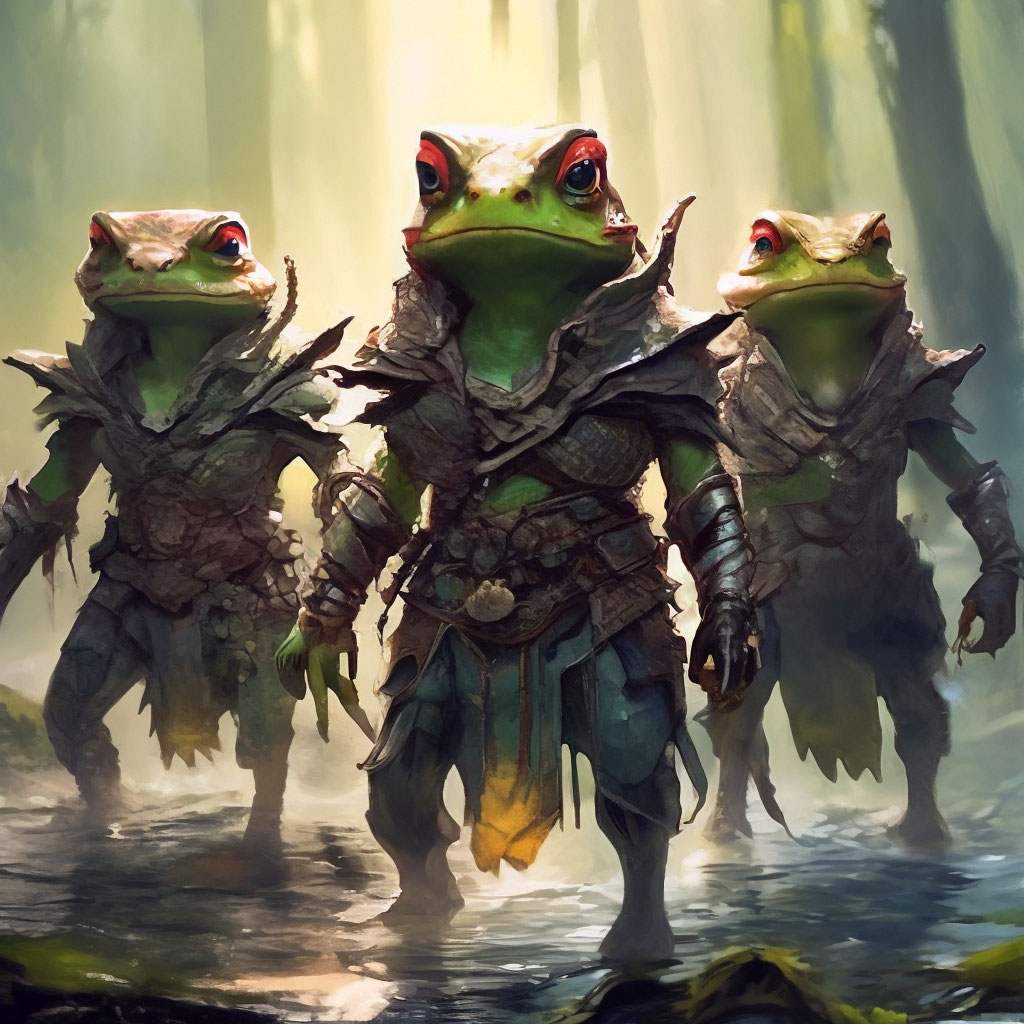

In [ ]:
norm_rv = norm(loc=5, scale=2)

# вся генеральная совокупность
x_frog = norm_rv.rvs(size = 10**4)

np.mean(x_frog) # настоящее среднее

5.019611370764926

Лягушус любит проверять племя на знание статистики и если оценки племени близки к истинным поощряет их.

Поэтому 3 великих жреца лягушек вызвались помочь племени в оценках

* Жрец Ровитао (страж болотных глубин) уверен в своей оценке:

$$ \hat \theta_{ro} = \frac{1}{n}\sum_{i=1}^{n} x_i.$$

* Жрец Лофир (Тот кто зовет ливень) не любит, когда его обливают водой за слишком хорошие прогнозы и корректирует оценку:

$$ \hat \theta_{lo} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{140}{n}.$$

* Жрец Ворукса  (Слышащий шепот воды) тоже коректирует прогноз по мелодии дождей:

$$ \hat \theta_{vo} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{2 \cdot (n+2)}{n}.$$

In [ ]:
norm_rv = stats.norm(loc=5, scale=2)

# вся генеральная совокупность
x_frog = norm_rv.rvs(size = 10**4)

np.mean(x_frog) # настоящее среднее



5.023366086482518

In [ ]:
n = 100

th_ro = np.zeros(200)
th_lo = np.zeros(200)
th_vo = np.zeros(200)

for i in range(200):
    x_sample = np.random.choice(x_frog, size=n, replace=False)
    x_mean = np.mean(x_sample)
    th_ro[i] = x_mean
    th_lo[i] = x_mean - 140/n
    th_vo[i] = x_mean - 2*(n+1)/n

In [ ]:
np.mean(th_ro), np.mean(th_lo), np.mean(th_vo)

(5.011230670167804, 3.6112306701678034, 2.9912306701678038)

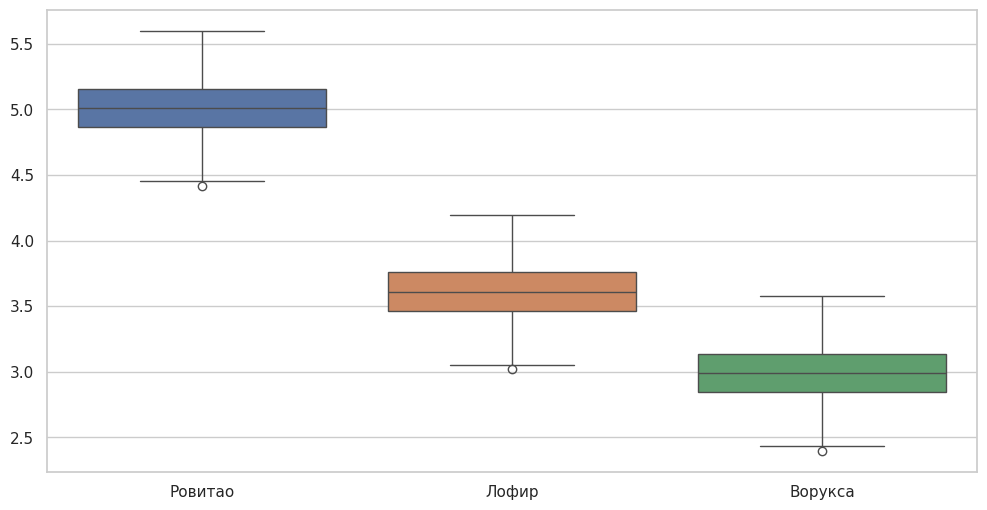

In [ ]:
plt.figure(figsize=(12,6))

df = pd.DataFrame(zip(th_ro, th_lo, th_vo), columns = ['Ровитао', 'Лофир', 'Ворукса'])
sns.boxplot(data = df,);

In [ ]:
from ipywidgets import interact, IntSlider, FloatSlider
sns.set(style="whitegrid")
%matplotlib inline

def interactive_boxplot(mu, sigma, n):
    # Создаем нормальное распределение
    norm_rv = norm(loc=mu, scale=sigma)

    # Генеральная совокупность
    x_frog = norm_rv.rvs(size=10000)

    th_ro = np.zeros(200)
    th_lo = np.zeros(200)
    th_vo = np.zeros(200)

    for i in range(200):
        x_sample = np.random.choice(x_frog, size=n, replace=False)
        x_mean = np.mean(x_sample)
        th_ro[i] = x_mean
        th_lo[i] = x_mean - 140/n
        th_vo[i] = x_mean - 2*(n+1)/n

    df = pd.DataFrame({
        'Ровитао': th_ro,
        'Лофир': th_lo,
        'Ворукса': th_vo
    })

    plt.figure(figsize=(12,6))
    sns.boxplot(data=df)
    plt.title('Ящичковые диаграммы для различных оценок')
    plt.ylabel('Значение оценки')
    plt.show()

interact(interactive_boxplot,
         mu=FloatSlider(value=5, min=-10, max=10, step=0.5, description='μ'),
         sigma=FloatSlider(value=2, min=0.1, max=5, step=0.1, description='σ'),
         n=IntSlider(value=100, min=10, max=1000, step=10, description='n'));


interactive(children=(FloatSlider(value=5.0, description='μ', max=10.0, min=-10.0, step=0.5), FloatSlider(valu…